Ave_P_aurelia =

   500.35906
     0.82529

Ave_P_caudatum =

   200.47507
     0.62443



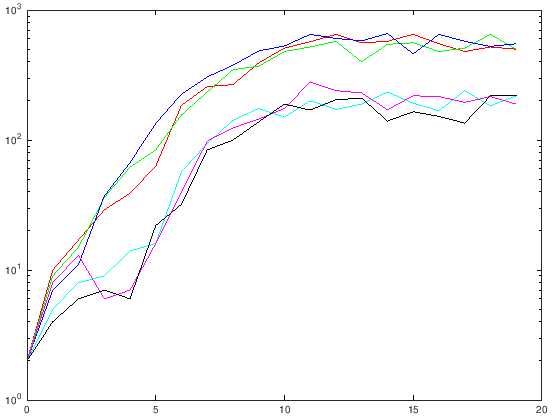

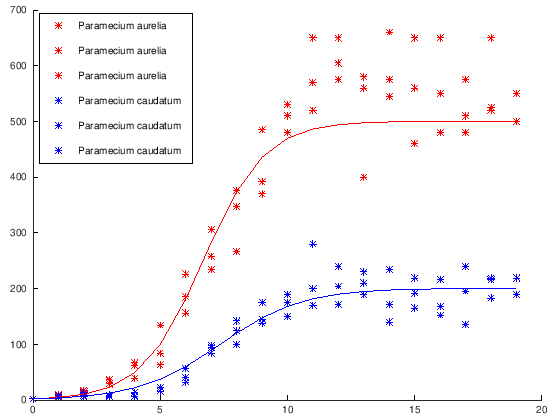

In [7]:
% M5.3: Using the Logistic with data: Paramecium experiment
setenv ("GNUTERM","xlib")
more off
% Data for Paramecium aurelia
par1=[2 10 17 29 39 63 185 258 267 392 510 570 650 560 575 650 550 480 520 500];
par2=[2 9 15 36 62 84 156 234 348 370 480 520 575 400 545 560 480 510 650 500];
par3=[2 7 11 37 67 134 226 306 376 485 530 650 605 580 660 460 650 575 525 550];

% Data for Paramecium caudatum
par4=[2 5 8 9 14 16 57 94 142 175 150 200 172 189 234 192 168 240 183 219];
par5=[2 8 13 6 7 16 40 98 124 145 175 280 240 230 171 219 216 195 216 189];
par6=[2 4 6 7 6 22 32 84 100 138 189 170 204 210 140 165 152 135 219 219];

figure(1)
hold on
plot(0:length(par1)-1,par1,'*r');
plot(0:length(par2)-1,par2,'*r');
plot(0:length(par3)-1,par3,'*r');
plot(0:length(par4)-1,par4,'*b');
plot(0:length(par5)-1,par5,'*b');
plot(0:length(par6)-1,par6,'*b');
legend({'Paramecium aurelia', 'Paramecium aurelia', 'Paramecium aurelia',...
         'Paramecium caudatum','Paramecium caudatum','Paramecium caudatum'},...
         'location','northwest');

% Check for density independent growth
% Remember: Density independent growth straight line - slope = r (cts); slope=log(R) discrete 
figure(2)
semilogy(0:length(par1)-1,par1,'r')
hold on 
semilogy(0:length(par2)-1,par2,'g')
hold on
semilogy(0:length(par3)-1,par3,'b')
hold on
semilogy(0:length(par4)-1,par4,'c')
hold on
semilogy(0:length(par5)-1,par5,'m')
hold on
semilogy(0:length(par6)-1,par6,'k')

%script06_fit %uncomment to run fit script

% M5.4. Fit logistic model through time
more off
Initial1=[500; 1]'; % Initial estimates of K and r
Initial2=[200; 1]';
t=0:19;
% Fit model for each experiment
paramEsts=zeros(2,6);

n0=2; % Initial population size is first value in experiment
%modelFun = @(p,t) p(1)./(1+(p(1)./n0-1).*exp(-p(2).*t)); % Estimating r and K for Logistic
for j=1:6
    yvalues=eval(['par', num2str(j)]); % eval - executing a string in Matlab
%     paramEsts(:,j) = nlinfit(t, yvalues, modelFun, Initial);
    
  if (j<4)   
    paramEsts(:,j) = fminsearch(@(p) testfit(p,t,yvalues,n0),Initial1);
  else
    paramEsts(:,j) = fminsearch(@(p) testfit(p,t,yvalues,n0),Initial2);
  end
end
% paramEsts=bsxfun(@times,ones(2,6),[500;0.8]);
Ave_P_aurelia = mean(paramEsts(:, 1:3),2)
Ave_P_caudatum = mean(paramEsts(:, 4:6),2)

figure(1)
plot(t,Ave_P_aurelia(1)./(1+(Ave_P_aurelia(1)./n0-1).*exp(-Ave_P_aurelia(2).*t)),'r')
plot(t,Ave_P_caudatum(1)./(1+(Ave_P_caudatum(1)./n0-1).*exp(-Ave_P_caudatum(2).*t)),'b')
